# NIfTI Basic Tutorial

This code is from a tutorial

https://carpentries-incubator.github.io/SDC-BIDS-IntroMRI/anatomy-of-nifti/index.html

This will show how to load a NIfTI file and do very basic analysis on it

## Load Image

`NiBabel` is used to work with neuroimaging data, in this case NIfTI images.

`load()` loads the image

The `header` attribute gives information about the image file

In [5]:
import nibabel as nib
img = nib.load('rest.nii.gz')

print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  4  64  64  35 251   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  2.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 34
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 96.66492
qoffset_y       : -58.083405
qoffset_z       : -16.50471
srow_x          : [-3.    

The header is a dictionary. Can view all of keys for the image

In [3]:
img.header.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

## Data

Header contains useful info that gives data about properties (metadata) associated with image

In [7]:
img_data = img.get_fdata()
img_data

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.

The image is a NumPy array representing each pixel

In [8]:
type(img_data)

numpy.ndarray

The array has four dimensions: x, y, z, and time

In [9]:
img_data.ndim

4

These are the dimensions of the image

In [10]:
img_data.shape

(64, 64, 35, 251)

Each element in the NumPy array is a float

In [11]:
img_data.dtype

dtype('float64')

Determine the range of the image

In [14]:
import numpy as np
print('Min', np.min(img_data))
print('Max', np.max(img_data))

Min 0.0
Max 1857.0


Can inspect an single voxel at coordinate (10,20,3) with time = 0 with the following

In [17]:
img_data[9,19,2,0]

96.0

## Working with Image Data

Can select a single plane by slicing the matrix

In [19]:
x_slice = img_data[9,:,:,0]
x_slice

array([[ 49.,  87.,  44., ...,   4.,  24.,  21.],
       [ 18.,  37.,  18., ...,   6.,  25.,   5.],
       [ 19.,  52.,  14., ...,  11.,  19.,  32.],
       ...,
       [135., 109.,  78., ...,  11.,  34.,  33.],
       [114., 105.,  72., ...,  21.,  24.,  10.],
       [ 95., 100.,  68., ...,  16.,  26.,  13.]])

In [20]:
y_slice = img_data[:,19,:,0]
y_slice

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [20.,  9., 14., ..., 19.,  8.,  4.],
       [26., 33.,  4., ..., 24., 17., 25.],
       ...,
       [39., 20., 33., ..., 11., 25., 17.],
       [22., 33., 22., ...,  7., 13., 23.],
       [12., 24., 32., ..., 14., 11., 38.]])

In [21]:
z_slice = img_data[:,:,2,0]
z_slice

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [20., 13.,  7., ..., 31., 12., 11.],
       [11., 17., 10., ..., 21., 16., 30.],
       ...,
       [21., 30., 25., ..., 11., 33.,  9.],
       [29., 26., 22., ..., 15.,  6., 17.],
       [16., 15., 20., ..., 18., 17., 33.]])

## Visualizing data

View the slices on a graph that is easier to understand

Use `matplotlib.pyplot` to display the images in the notebook

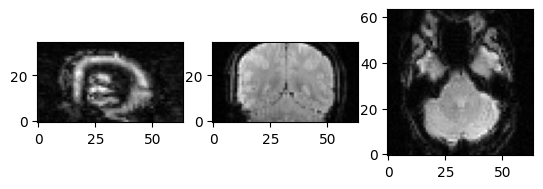

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap='gray', origin='lower')

## Afine

Tells position of image array data in a reference to space. Affine matrix translates voxel cooredinates to world space coordinates.

In [23]:
img.affine

array([[ -3.        ,  -0.        ,  -0.        ,  96.66491699],
       [ -0.        ,   3.        ,  -0.        , -58.08340454],
       [  0.        ,   0.        ,   3.        , -16.50470924],
       [  0.        ,   0.        ,   0.        ,   1.        ]])